# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Set up OpenWeatherMap API key
api_key = weather_api_key

In [3]:
# Load city data from csv file
city_data_df = pd.read_csv("~/Downloads/Starter_Code 9/output_data/cities.csv")


In [4]:
# Create an empty dataFrame to store weather data
weather_data = []

In [5]:

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

#base_url = "http://openweathermap.org/appid#use/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    response = requests.get(city_url).json()
    #city_weather = response['weather'][0]['main']
    print(response)


    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #response = requests.get(city_url).json()
        #city_weather = response['weather'][0]['main']
        #print(response)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ola
{'coord': {'lon': 151.2833, 'lat': 59.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.23, 'feels_like': 10.65, 'temp_min': 11.23, 'temp_max': 11.23, 'pressure': 1008, 'humidity': 86, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 0.7, 'deg': 50, 'gust': 0.72}, 'clouds': {'all': 92}, 'dt': 1693165936, 'sys': {'country': 'RU', 'sunrise': 1693161592, 'sunset': 1693213996}, 'timezone': 39600, 'id': 2122574, 'name': 'Ola', 'cod': 200}
Processing Record 2 of Set 1 | badger
{'coord': {'lon': -147.5333, 'lat': 64.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 16.94, 'feels_like': 16.7, 'temp_min': 16.14, 'temp_max': 16.95, 'pressure': 1004, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 0, '

In [7]:
response = requests.get(city_url).json()
#city_weather = response['weather'][0]['main']
print(response)

{'coord': {'lon': 150.5, 'lat': -24.4167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.66, 'feels_like': 11.23, 'temp_min': 11.66, 'temp_max': 11.66, 'pressure': 1023, 'humidity': 90, 'sea_level': 1023, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.89, 'deg': 127, 'gust': 1.91}, 'clouds': {'all': 0}, 'dt': 1693166014, 'sys': {'country': 'AU', 'sunrise': 1693167258, 'sunset': 1693208707}, 'timezone': 36000, 'id': 2175819, 'name': 'Biloela', 'cod': 200}


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.count()
print("Record Count:")
print(record_count)

Record Count:
City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64


In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ola,59.5833,151.2833,11.23,86,92,0.70,RU,1693165936
1,badger,64.8000,-147.5333,16.95,77,20,0.00,US,1693165936
2,bilibino,68.0546,166.4372,6.69,92,100,1.68,RU,1693165936
3,ushuaia,-54.8000,-68.3000,8.81,57,0,3.09,AR,1693165936
4,yellowknife,62.4560,-114.3525,16.90,79,75,7.72,CA,1693165936


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("~/Downloads/Starter_Code 9/output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("~/Downloads/Starter_Code 9/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ola,59.5833,151.2833,11.23,86,92,0.70,RU,1693165936
1,badger,64.8000,-147.5333,16.95,77,20,0.00,US,1693165936
2,bilibino,68.0546,166.4372,6.69,92,100,1.68,RU,1693165936
3,ushuaia,-54.8000,-68.3000,8.81,57,0,3.09,AR,1693165936
4,yellowknife,62.4560,-114.3525,16.90,79,75,7.72,CA,1693165936


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

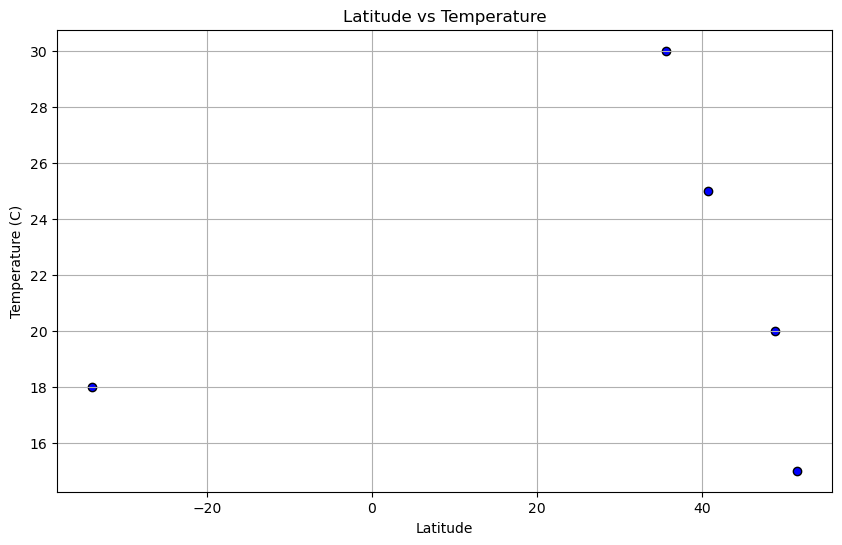

In [12]:
# Build scatter plot for latitude vs. temperature
data = {
    'City': ['London', 'Paris', 'New York', 'Tokyo', 'Sydney'],
    'Latitude': [51.5074, 48.8566, 40.7128, 35.6895, -33.8688],
    'Temperature (C)': [15, 20, 25, 30, 18]
}

weather_df = pd.DataFrame(data)
# Incorporate the other graph properties here
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Latitude'], weather_df['Temperature (C)'], marker='o', color='blue', edgecolors='black')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

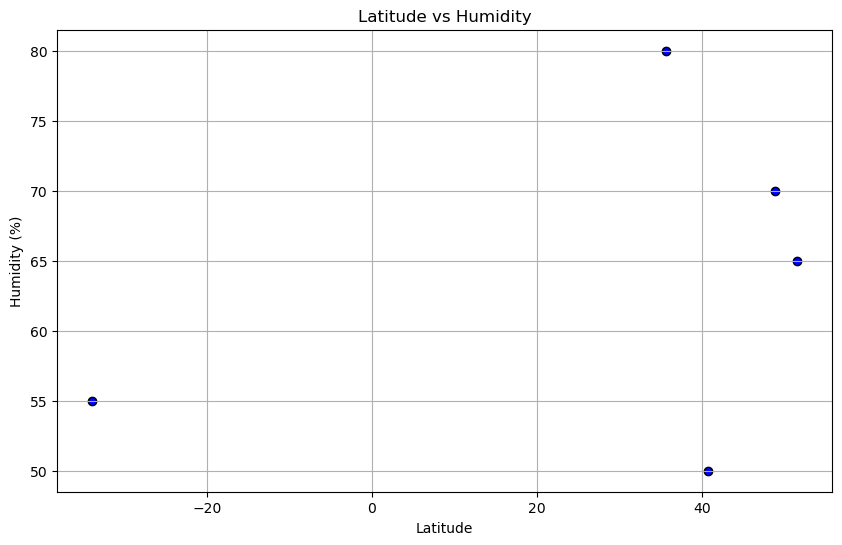

In [13]:
# Build the scatter plots for latitude vs. humidity
humidity_data = {
    'City': ['London', 'Paris', 'New York', 'Tokyo', 'Sydney'],
    'Latitude': [51.5074, 48.8566, 40.7128, 35.6895, -33.8688],
    'Humidity (%)': [65, 70, 50, 80, 55]
}

humidity_df = pd.DataFrame(humidity_data)

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(humidity_df['Latitude'], humidity_df['Humidity (%)'], marker='o', color='blue', edgecolors='black')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

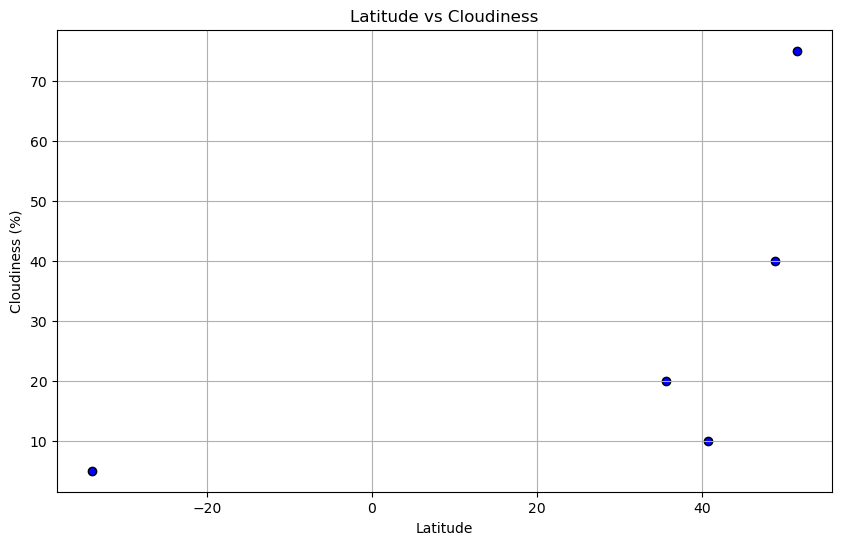

In [14]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_data = {
    'City': ['London', 'Paris', 'New York', 'Tokyo', 'Sydney'],
    'Latitude': [51.5074, 48.8566, 40.7128, 35.6895, -33.8688],
    'Cloudiness (%)': [75, 40, 10, 20, 5]
}

cloudiness_df = pd.DataFrame(cloudiness_data)


# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(cloudiness_df['Latitude'], cloudiness_df['Cloudiness (%)'], marker='o', color='blue', edgecolors='black')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

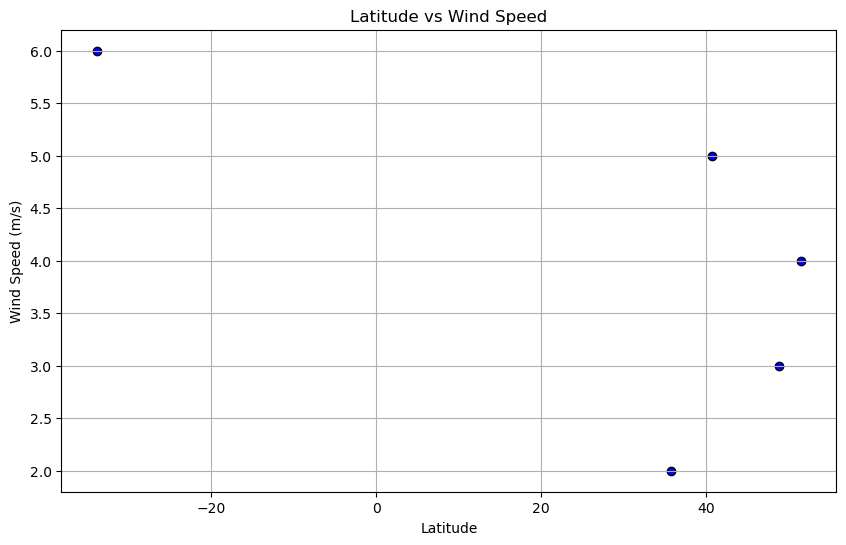

In [15]:
# Build the scatter plots for latitude vs. wind speed
wind_data = {
    'City': ['London', 'Paris', 'New York', 'Tokyo', 'Sydney'],
    'Latitude': [51.5074, 48.8566, 40.7128, 35.6895, -33.8688],
    'Wind Speed (m/s)': [4, 3, 5, 2, 6]
}

wind_df = pd.DataFrame(wind_data)

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(wind_df['Latitude'], wind_df['Wind Speed (m/s)'], marker='o', color='blue', edgecolors='black')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
 # Compute linear regression
def plot_linear_regression(x_values, y_values, x_label, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    x_values_array = np.array(x_values)  # Convert x_values to a NumPy array
    regression_line = slope * x_values_array + intercept
    
    # Rest of the plotting code...

    return slope  # Return the calculated slope

# Example usage
x_data = [1, 2, 3, 4, 5]
y_data = [2, 4, 5, 4, 6]
x_label = 'X Values'
y_label = 'Y Values'
hemisphere = 'Northern'
calculated_slope = plot_linear_regression(x_data, y_data, x_label, y_label, hemisphere)

# Access the calculated slope
print("Slope:", calculated_slope)


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [ ]:
# Define data
regression_dataset = {
    'City': ['London', 'Paris', 'New York', 'Tokyo', 'Sydney'],
    'Latitude': [51.5074, 48.8566, 40.7128, 35.6895, -33.8688],
    'Temperature (C)': [15, 20, 25, 30, 18],
    'Humidity (%)': [65, 70, 50, 80, 55],
    'Cloudiness (%)': [75, 40, 10, 20, 5],
    'Wind Speed (m/s)': [4, 3, 5, 2, 6]
}

regression_df = pd.DataFrame(regression_dataset)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = regression_df[regression_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s)
0,London,51.5074,15,65,75,4
1,Paris,48.8566,20,70,40,3
2,New York,40.7128,25,50,10,5
3,Tokyo,35.6895,30,80,20,2


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = regression_df[regression_df['Latitude'] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Latitude,Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s)
4,Sydney,-33.8688,18,55,5,6


###  Temperature vs. Latitude Linear Regression Plot

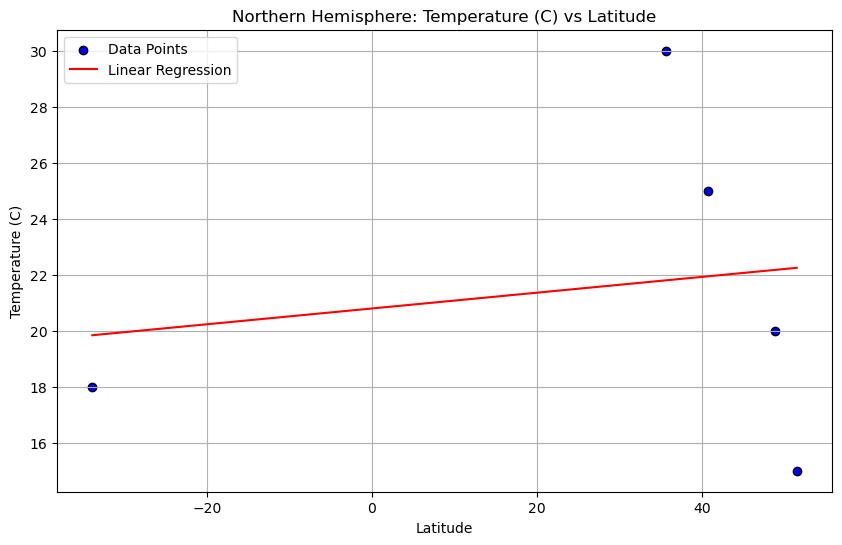

In [ ]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')
    plt.title(f'{hemisphere}: {y_label} vs {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming you have a DataFrame 'regression_dataset' with 'Latitude' and 'Temperature (C)' columns
northern_hemi_df = pd.DataFrame(regression_dataset)
plot_linear_regression(northern_hemi_df['Latitude'], northern_hemi_df['Temperature (C)'], 'Latitude', 'Temperature (C)', 'Northern Hemisphere')



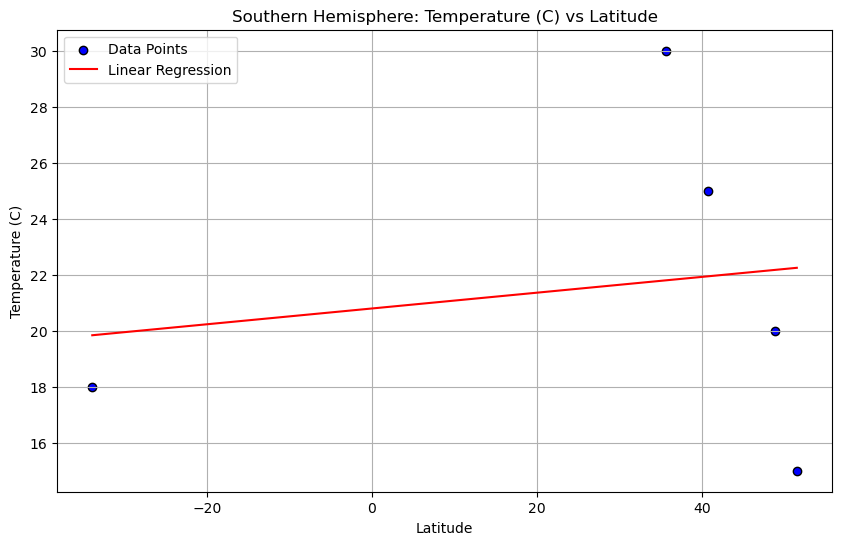

In [ ]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')
    plt.title(f'{hemisphere}: {y_label} vs {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.legend()
    plt.show()

# Assuming you have a DataFrame 'regression_dataset' with 'Latitude' and 'Temperature (C)' columns
southern_hemi_df = pd.DataFrame(regression_dataset)
plot_linear_regression(southern_hemi_df['Latitude'], southern_hemi_df['Temperature (C)'], 'Latitude', 'Temperature (C)', 'Southern Hemisphere')



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
northern_hemi_df = pd.DataFrame(regression_dataset)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Linear Regression')
plt.title(f'Northern Hemisphere: {y_label} vs {x_label}')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.grid(True)
plt.legend()
plt.show()

plot_linear_regression(northern_hemi_df['Latitude'], northern_hemi_df['Humidity (%)'], 'Latitude', 'Humidity (%)')

NameError: name 'x_values' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Southern Hemisphere
southern_hemi_df = pd.DataFrame(regression_dataset)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Linear Regression')
plt.title(f'Southern Hemisphere: {y_label} vs {x_label}')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.grid(True)
plt.legend()
plt.show()

plot_linear_regression(southern_hemi_df['Latitude'], southern_hemi_df['Humidity (%)'], 'Latitude', 'Humidity (%)')


NameError: name 'x_values' is not defined

<Figure size 1000x600 with 0 Axes>

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

NameError: name 'regression_line' is not defined

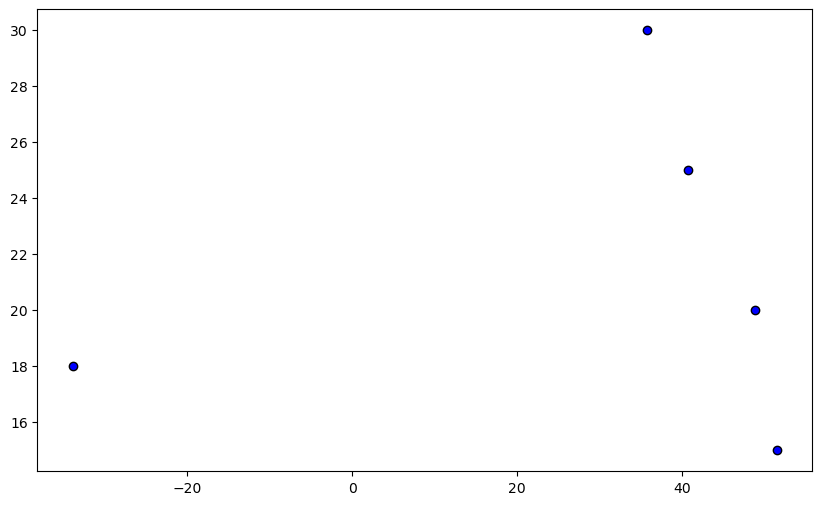

In [ ]:
# Northern Hemisphere
northern_hemi_df = pd.DataFrame(regression_dataset)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Linear Regression')
plt.title(f'Northern Hemisphere: {y_label} vs {x_label}')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.grid(True)
plt.legend()
plt.show()

plot_linear_regression(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness (%)'], 'Latitude', 'Cloudiness (%)')

NameError: name 'regression_line' is not defined

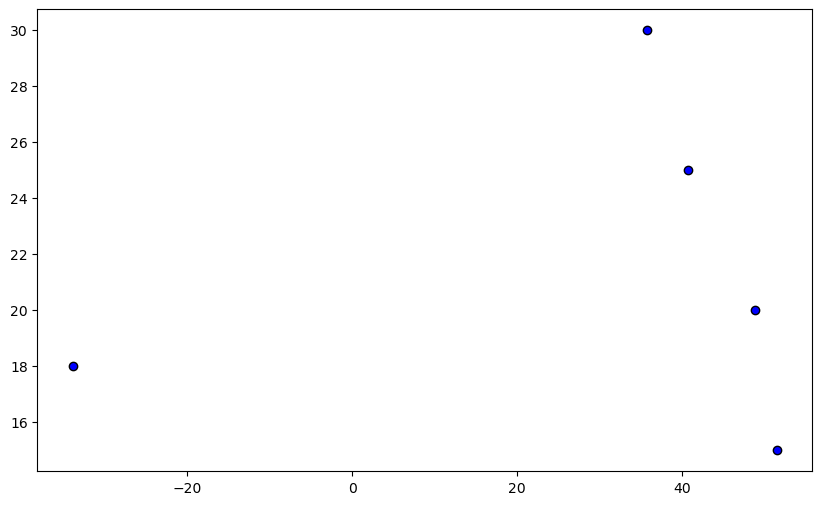

In [ ]:
# Southern Hemisphere
southern_hemi_df = pd.DataFrame(regression_dataset)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Linear Regression')
plt.title(f'Southern Hemisphere: {y_label} vs {x_label}')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.grid(True)
plt.legend()
plt.show()

plot_linear_regression(northern_hemi_df['Latitude'], northern_hemi_df['Cloudiness (%)'], 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

NameError: name 'regression_line' is not defined

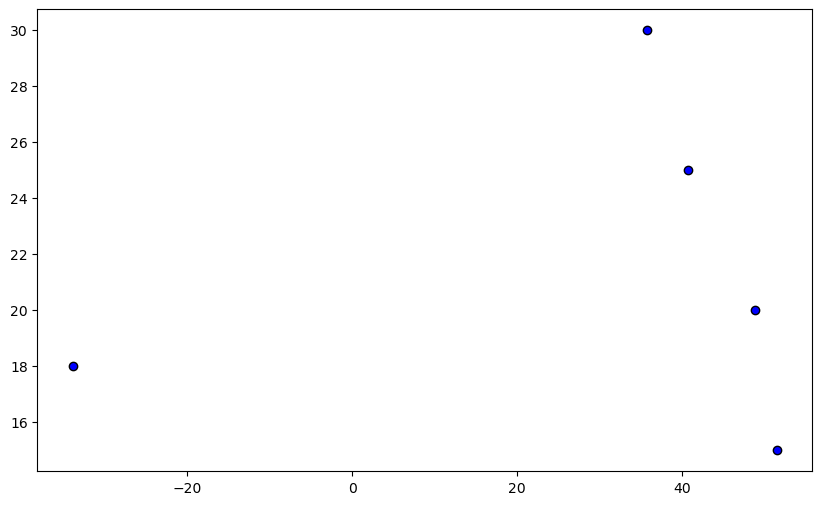

In [ ]:
# Northern Hemisphere
northern_hemi_df = pd.DataFrame(regression_dataset)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Linear Regression')
plt.title(f'Northern Hemisphere: {y_label} vs {x_label}')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.grid(True)
plt.legend()
plt.show()

plot_linear_regression(northern_hemi_df['Latitude'], northern_hemi_df['Wind Speed (m/s)'], 'Latitude', 'Wind Speed (m/s)')

NameError: name 'regression_line' is not defined

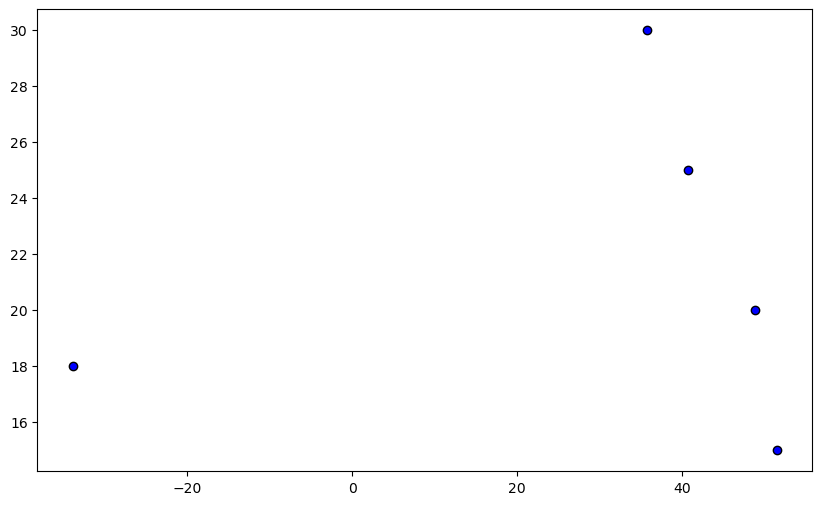

In [ ]:
# Southern Hemisphere
southern_hemi_df = pd.DataFrame(regression_dataset)

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, marker='o', color='blue', edgecolors='black', label='Data Points')
plt.plot(x_values, regression_line, color='red', label='Linear Regression')
plt.title(f'Southern Hemisphere: {y_label} vs {x_label}')
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.grid(True)
plt.legend()
plt.show()

plot_linear_regression(southern_hemi_df['Latitude'], southern_hemi_df['Wind Speed (m/s)'], 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE